# ||Random forest algorthim||-#

Random Forest is a **flexible**, **easy** to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because it’s simplicity and the fact that it can be used for both classification and regression tasks.

## Working of Random Forest Algorithm
Before understanding the working of the random forest we must look into the ensemble technique. Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

Ensemble uses two types of methods:


1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

![iamge](https://editor.analyticsvidhya.com/uploads/4661536426211ba43ea612c8e1a6a1ed45507.png)

## Bagging
Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.


![imag](https://editor.analyticsvidhya.com/uploads/77772440px-Ensemble_Bagging.svg.png)

Now let’s look at an example by breaking it down with the help of the following figure. Here the bootstrap sample is taken from actual data (Bootstrap sample 01, Bootstrap sample 02, and Bootstrap sample 03) with a replacement which means there is a high possibility that each sample won’t contain unique data. Now the model (Model 01, Model 02, and Model 03) obtained from this bootstrap sample is trained independently. Each model generates results as shown. Now Happy emoji is having a majority when compared to sad emoji. Thus based on majority voting final output is obtained as Happy emoji.

![img](https://editor.analyticsvidhya.com/uploads/325745-Bagging-ensemble-method.png)

Steps involved in random forest algorithm:

* Step 1: In Random forest n number of random records are taken from the data set having k number of records.

* Step 2: Individual decision trees are constructed for each sample.

* Step 3: Each decision tree will generate an output.

* Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.


![iamge](https://editor.analyticsvidhya.com/uploads/24015Random+Forest.jpg)

A prediction on a regression problem is the average of the prediction across the trees in the ensemble. A prediction on a classification problem is the majority vote for the class label across the trees in the ensemble.

> Regression: Prediction is the average prediction across the decision trees.\
> Classification: Prediction is the majority vote class label predicted across the decision trees.

Random forest involves constructing a large number of decision trees from bootstrap samples from the training dataset, like bagging.

Unlike bagging, random forest also involves selecting a subset of input features (columns or variables) at each split point in the construction of trees. Typically, constructing a decision tree involves evaluating the value for each input variable in the data in order to select a split point. By reducing the features to a random subset that may be considered at each split point, it forces each decision tree in the ensemble to be more different

# For More Info Visit [Link](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

# ||Step 1-Data Preprocessing||#

In [1]:

#import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading csv(comma separated values) file.......
# iris=pd.read_csv("../input/Iris.csv")
iris = sns.load_dataset('iris')

In [3]:

#Check dataset.......
iris.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Checking the dimensions....
iris.shape


(150, 5)

In [5]:

#checking whether a dataset contain a missing value or not/.....
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:

'''checking if there is any inconsistency in the dataset as we see there 
are no null values in the dataset, so the data can be processed...../'''
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Checkig the unique values in species column which is our target variable..
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
'''dropping the Id column as it is unnecessary, axis=1 specifies that 
it should be column wise, inplace =1 means 
the changes should be reflected into the dataframe'''
# iris.drop('id',axis=1,inplace=True)


'dropping the Id column as it is unnecessary, axis=1 specifies that \nit should be column wise, inplace =1 means \nthe changes should be reflected into the dataframe'

In [14]:

#checking data after droping "ID column".....
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# ||Visualize Sepal Length VS Sepal Width||

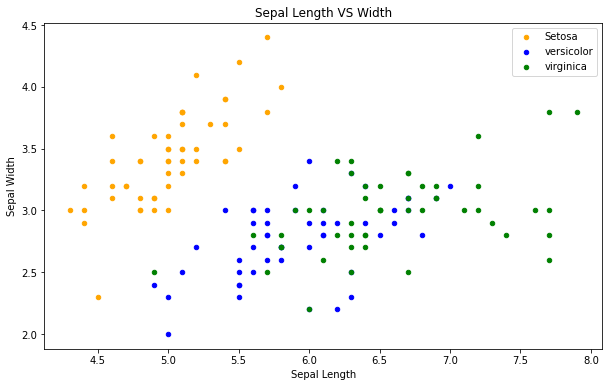

In [18]:

'''Some Exploratory Data Analysis With Iris'''

fig = iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
fig.savefig("Sepal Length VS Width.png")

# ||Visualize Petal Length VS Petal Width||

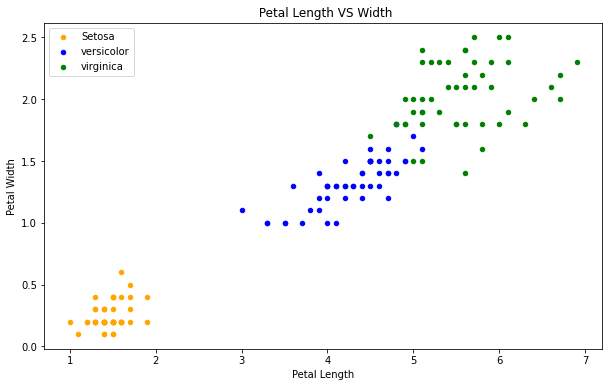

In [19]:

'''Some Exploratory Data Analysis With Iris'''
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='petal_length',y='petal_width',color='orange', label='Setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
fig.savefig("Petal Length VS Width.png")


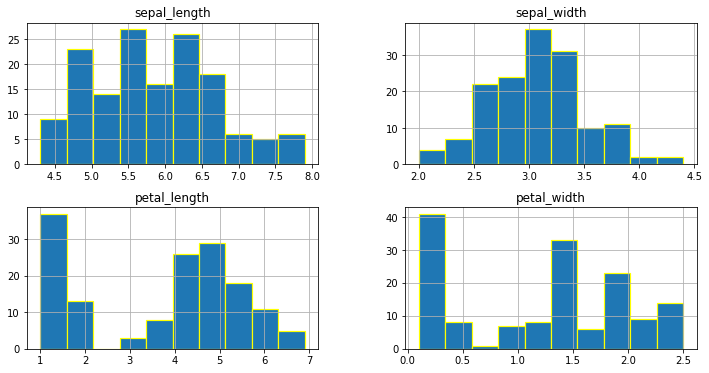

In [20]:

'''let us see how are the length and width are distributed'''
iris.hist(edgecolor='Yellow', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


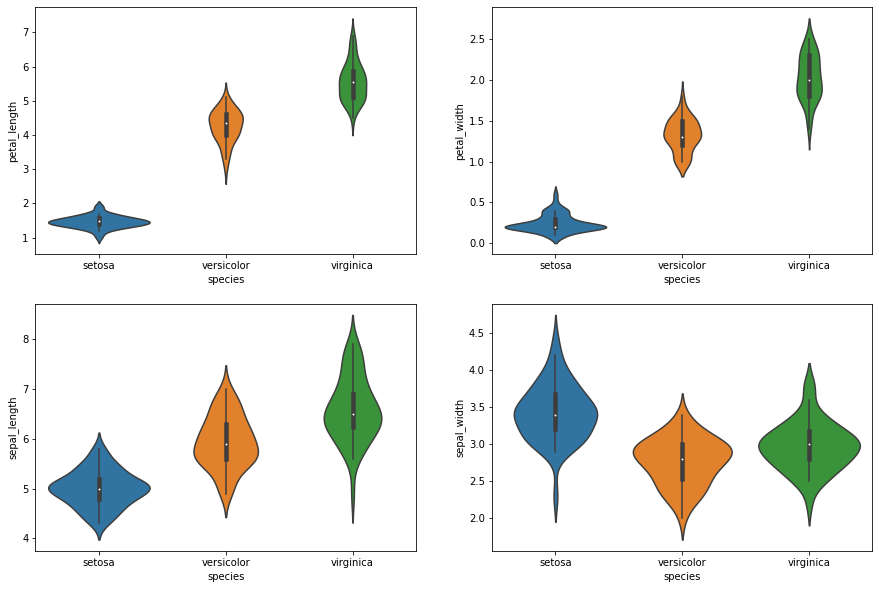

In [23]:

'''Let us see how the length and width vary according to the species'''
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
fig.savefig("variable with species.png")



'''Now, when we train any algorithm, the number of features and 
their correlation plays an important role. 
If there are features and many of the features are highly correlated,
then training an algorithm with all the featues will reduce the accuracy. 
Thus features selection should be done carefully. 
This dataset has less featues but still we will see the correlation.'''

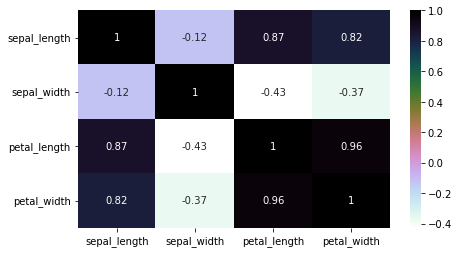

In [24]:
plt.figure(figsize=(7,4)) #7 is the size of the width and 4 is parts.... 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [26]:

#Separating dependent and independent values..
X=iris.iloc[:, :-1].values
X[:10]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [28]:
 
y=iris.iloc[:, -1].values
y[:10]


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [29]:
#splitting into training set and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)


# ||Step 2-Building a model||

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[13,  0,  0],
       [ 0,  5,  1],
       [ 0,  2,  9]], dtype=int64)

In [34]:

from sklearn import metrics #for checking the model accuracy
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Random forest is: 0.9
